In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, AvgPool2D, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [2]:
train_data0 = np.load('./DL-Project/data0.npy')
train_data1 = np.load('./DL-Project/data1.npy')
train_data2 = np.load('./DL-Project/data2.npy')

train_lab0 = np.load('./DL-Project/lab0.npy')
train_lab1 = np.load('./DL-Project/lab1.npy')
train_lab2 = np.load('./DL-Project/lab2.npy')


In [ ]:
# Concatenate the training data arrays vertically
train_data = np.vstack((train_data0, train_data1, train_data2))
# Concatenate the labels arrays horizontally 
train_lab = np.hstack((train_lab0, train_lab1, train_lab2))

print("Dataset sizes:", train_data.shape, train_lab.shape)

Dataset sizes: (30000, 40, 168) (30000,)


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(train_data, train_lab, test_size=0.2, random_state=42)
# Define image dimensions and reshape data to include a single channel
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Train Test split:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train Test split: (24000, 40, 168, 1) (6000, 40, 168, 1) (24000,) (6000,)


In [5]:
# Number of unique categories
num_category = 37
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
print("One-hot encoded label size:", y_train.shape, y_test.shape)

One-hot encoded label size: (24000, 37) (6000, 37)


In [6]:
# Visualise predictions 
def check_answers(trained_model, X, Y, start):
  label_preds = trained_model.predict(X)
  f = plt.figure(figsize=(20,4))
  axs1 = f.add_subplot(241)
  axs2 = f.add_subplot(242)
  axs3 = f.add_subplot(243)
  axs4 = f.add_subplot(244)
  axs5 = f.add_subplot(245)
  axs6 = f.add_subplot(246)
  axs7 = f.add_subplot(247)
  axs8 = f.add_subplot(248)
  axs1.imshow(X[start, :, :, 0])
  axs1.set_title('Corr: ' + str(np.argmax(Y[start])) + " Pred: " + str(np.argmax(label_preds[start])))
  axs2.imshow(X[start+1, :, :, 0])
  axs2.set_title('Corr: ' + str(np.argmax(Y[start+1])) + " Pred: " + str(np.argmax(label_preds[start+1])))
  axs3.imshow(X[start+2, :, :, 0])
  axs3.set_title('Corr: ' + str(np.argmax(Y[start+2])) + " Pred: " + str(np.argmax(label_preds[start+2])))
  axs4.imshow(X[start+3, :, :, 0])
  axs4.set_title('Corr: ' + str(np.argmax(Y[start+3])) + " Pred: " + str(np.argmax(label_preds[start+3])))
  axs5.imshow(X[start+4, :, :, 0])
  axs5.set_title('Corr: ' + str(np.argmax(Y[start+4])) + " Pred: " + str(np.argmax(label_preds[start+4])))
  axs6.imshow(X[start+5, :, :, 0])
  axs6.set_title('Corr: ' + str(np.argmax(Y[start+5])) + " Pred: " + str(np.argmax(label_preds[start+5])))
  axs7.imshow(X[start+6, :, :, 0])
  axs7.set_title('Corr: ' + str(np.argmax(Y[start+6])) + " Pred: " + str(np.argmax(label_preds[start+6])))
  axs8.imshow(X[start+7, :, :, 0])
  axs8.set_title('Corr: ' + str(np.argmax(Y[start+7])) + " Pred: " + str(np.argmax(label_preds[start+7])))

# Evaluate the model using metrics
def check_metrics(model, X_test, y_test):  
  y_pred = np.argmax(model.predict(X_test),axis = 1)
  y_true = np.argmax(y_test, axis=1)
  print('##############  Confusion Matrix  ##############')
  print()
  np.set_printoptions(threshold=np.inf)
  print(confusion_matrix(y_true, y_pred))
  np.set_printoptions(threshold=100)
  print()
  print('##############  Classification Report  ##############')
  print()
  target_names = [str(i) for i in range(37)]
  print(classification_report(y_true, y_pred, target_names=target_names))

### CNN Metrics and Predictions

Model Loaded
Loaded Model Metrics
Accuracy: 69.47%
Loss: 1.93
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step
##############  Confusion Matrix  ##############

[[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   4   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  12   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   1  24   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   3  17   4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

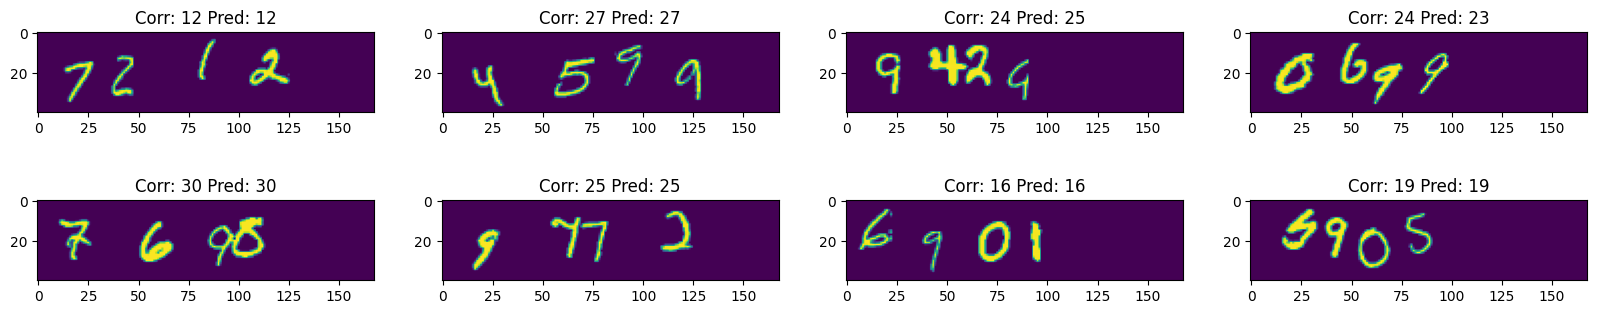

In [ ]:
# Load model and weights
file_name = "CNN3Model"
json_file = open(file_name + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(file_name + ".weights.h5")
print("Model Loaded")

# Evaluate loaded model on test data
loaded_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("Loaded Model Metrics\nAccuracy: %.2f%%\nLoss: %.2f" % (score[1]*100, score[0]))
check_answers(loaded_model, X_test, y_test, 5245)
check_metrics(loaded_model, X_test, y_test)